In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from glob import glob1

In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size': 30})
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['font.family']='arial'
params = {'legend.edgecolor': '0',
          'lines.markersize' : 5,
          'legend.borderaxespad': 1.5,
          'legend.fancybox': False,
          'legend.fontsize': 20.0,
          'legend.framealpha': 0.5,
          'legend.labelspacing': 0.3,
          'legend.markerscale': 1.0,
          'figure.figsize': (10, 8),
         'axes.labelsize': 30,
         'axes.titlesize': 30,
         'axes.linewidth': 3,
         'axes.xmargin': 0.03,
         'axes.ymargin': 0.03,
         'xtick.direction': 'in',
         'xtick.labelsize': 30,
         'xtick.major.pad': 10,
         'xtick.major.size': 10,
         'xtick.major.width': 3,
         'xtick.minor.pad': 10,
         'xtick.minor.size': 5,
         'xtick.minor.visible': True,
         'xtick.minor.width': 2,
         'xtick.top': True,
         'ytick.direction': 'in',
         'ytick.labelsize': 30,
         'ytick.major.pad': 10,
         'ytick.major.size': 10,
         'ytick.major.width': 3,
         'ytick.minor.pad': 10,
         'ytick.minor.size': 5,
         'ytick.minor.visible': True,
         'ytick.minor.width': 2,
         'ytick.right': True,}
plt.rcParams.update(params)

In [4]:
def Gaussianfit(x,y,ax=None,isplot=False):
    from lmfit.models import GaussianModel
    mod = GaussianModel()
    params = mod.guess(y,x=x)
    result = mod.fit(y,params,x=x)
    if isplot:
        if ax is None:
            f = plt.figure()
            ax = f.add_subplot(111)
        ax.plot(x,y,'-o',alpha=0.75,color='navy')
        dummyx = np.linspace(min(x),max(x),1000)
        ax.plot(dummyx,mod.eval(result.params,x=dummyx),color='darkorange')
        try:
            ax.set_title('FWHM = %.3f +- %.3f'%(result.params['fwhm'].value,result.params['fwhm'].stderr))
        except:
            ax.set_title('FWHM = %.3f +- %.3f'%(result.params['fwhm'].value,0))
    return result, mod
    

In [5]:
def npz2mat(filename_npz):
    from scipy.io import savemat
    data = np.load(filename_npz)
    mdic = {"time_in_s": data['time_s'], 'spectrum': data['spectra'],'frequency_Hz': data['freq'] }
    savemat(filename_npz[:-4]+'.mat',mdic)

# filename = r'Z:\qfc\users\Armin\Ben_spectrums\12042022_QSIMQFC_beat_001.npz'
# npz2mat(filename)

In [98]:
directory = r'Z:\qfc\users\Armin\Ben_spectrums'
flst = glob1(directory,'*gain*.npz*')
flst2khz = glob1(directory,'*2kHz*.npz*')
flst = list( set(flst) - set(flst2khz) )
flst = flst2khz
flst = [flst[0],flst[1],flst[2],flst[-2],flst[-1]]
# flst = [flst[7],flst[1],flst[8],flst[4]]
# flst = [flst[4],flst[5],flst[0],flst[8]]
# flst = [flst[1],flst[2]]
flst 

['12042022_QSIMQFC_beat_main_gain3_2kHz.npz',
 '12042022_QSIMQFC_beat_main_gain4_2kHz.npz',
 '12042022_QSIMQFC_beat_main_gain5_2kHz.npz',
 '12042022_QSIMQFC_beat_main_gain6_2kHz.npz',
 '12042022_QSIMQFC_beat_main_gain7_eom_main_gain9_2kHz.npz']

<Parameter 'fwhm', value=219.73834401487036 +/- 1.42, bounds=[-inf:inf], expr='2.3548200*sigma'>
list index out of range
<Parameter 'fwhm', value=174.6912140763897 +/- 1.32, bounds=[-inf:inf], expr='2.3548200*sigma'>
<Parameter 'fwhm', value=185.42644287763224 +/- 1.17, bounds=[-inf:inf], expr='2.3548200*sigma'>
<Parameter 'fwhm', value=156.3320201590392 +/- 0.915, bounds=[-inf:inf], expr='2.3548200*sigma'>
<Parameter 'fwhm', value=124.96572477932301 +/- 0.825, bounds=[-inf:inf], expr='2.3548200*sigma'>


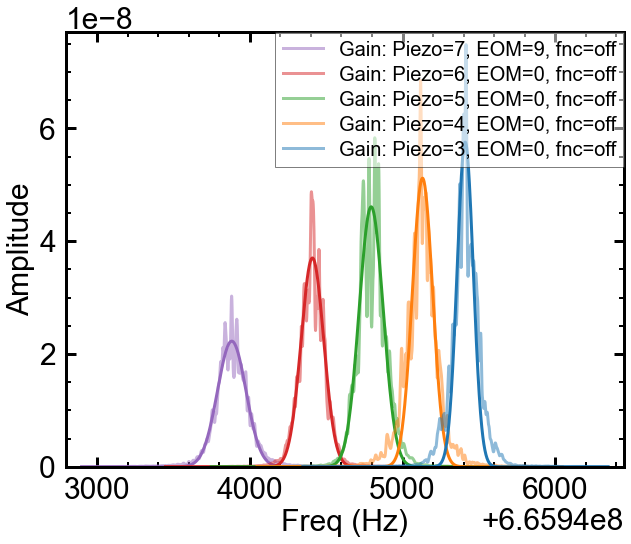

In [106]:

isfit = not False
plotlog= False
combineplot = True
import matplotlib.ticker
xfreq = []
yamp = []
pgain =[]
egain = []
for j in range(len(flst)):
    filename = os.path.join(directory,flst[j])
    filestr=flst[j]
    data = np.load(filename)
    freq = data['freq'][0]; spectra = data['spectra']; times = data['time_s']
    piezo_gain = int(filestr[filestr.find('beat_main_gain')+14:filestr.find('beat_main_gain')+15])
    try:
        eom_gain = int(filestr[filestr.find('eom_main_gain')+13:filestr.find('eom_main_gain')+14])
    except:
        eom_gain=0
    last_spectra = spectra[0]
    first_spectra = spectra[-1]
    average_spectra = spectra.mean(axis=0)
    if not combineplot:
        f = plt.figure()
        ax1 = f.add_subplot(111)
        if isfit:
            Gaussianfit(freq,average_spectra,ax=ax1,isplot=isfit)
            xtext = 1000
            piezovalue = 0.75
            eomvalue = 0.65
        else:
            ax1.plot(freq,average_spectra,color='navy')
            xtext = 250000
            piezovalue = 0.1
            eomvalue = 0.01
    #     
        ax1.text(np.median(freq)-xtext, max(average_spectra)*piezovalue,'Piezo Gain=%s'%piezo_gain)
        ax1.text(np.median(freq)-xtext, max(average_spectra)*eomvalue,'EOM Gain=%s'%eom_gain)
        ax1.set_xlabel('Freq (Hz)')
        if plotlog:
            ax1.set_yscale('log')
            locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
            ax1.yaxis.set_minor_locator(locmin)
            ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
        else:
            ax1.set_ylim(bottom=0)
        ax1.set_ylabel('Amplitude')

        f.savefig(filename[:-4]+'_average.png',dpi=100,bbox_inches='tight',facecolor='white')
        plt.close('all')
    else:
        xfreq.append(freq)
        yamp.append(average_spectra)
        pgain.append(piezo_gain)
        egain.append(eom_gain)
        fnc =['off','off','off','off']
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
        if j==len(flst)-1:
            f = plt.figure()
            ax1 = f.add_subplot(111)
            for k in range(len(xfreq))[::-1]:
                if isfit:
                    res,mod = Gaussianfit(xfreq[k],yamp[k],ax=ax1,isplot=False)
                    print (res.params['fwhm'])
                    ax1.plot(xfreq[k]-k*300,mod.eval(res.params,x=xfreq[k]),color=colors[k])
                    alpha =0.5
                else:
                    alpha=1
                try:
                    ax1.plot(xfreq[k]-k*300,yamp[k],label='Gain: Piezo=%i, EOM=%i, fnc=%s'%(pgain[k],egain[k],fnc[k]),alpha=alpha,color=colors[k])
                except Exception as ep:
                    print (ep)
                    ax1.plot(xfreq[k]-k*300,yamp[k],label='Gain: Piezo=%i, EOM=%i, fnc=%s'%(pgain[k],egain[k],"off"),alpha=alpha,color=colors[k])

            ax1.set_xlabel('Freq (Hz)')
            if plotlog:
                ax1.set_yscale('log')
                locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
                ax1.yaxis.set_minor_locator(locmin)
                ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
            else:
                ax1.set_ylim(bottom=0)
            ax1.legend(loc='upper right',borderaxespad=0)
            ax1.set_ylabel('Amplitude')
            f0 = np.median(xfreq[0])
#             ax1.set_xlim(f0-30000,f0+30000)
            f.savefig(filename[:-5]+'_comparison.png',dpi=100,bbox_inches='tight',facecolor='white')

# Simple Plotting a signal spectra

Text(0, 0.5, 'Amplitude')

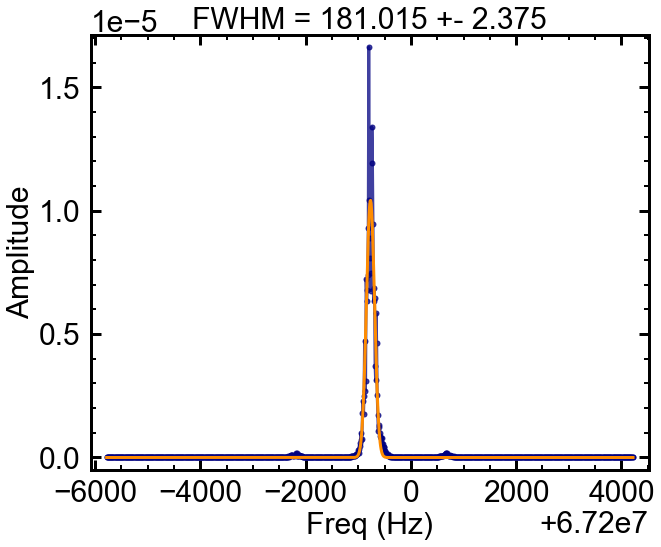

In [10]:
directory = r'Z:\qfc\users\Armin\timetagging_zerocrossing'
saved_filename = os.path.join(directory,"27042022_qsimqfc_beat_withnewclock_nofncintstab")
data = np.load(saved_filename+'.npz')
freq = data['freq']
amplitude = data['amplitude']

f = plt.figure()
ax  =f.add_subplot(111)
try:
    result, mod = Gaussianfit(freq,amplitude,ax,isplot=True)
except:
    print ('Error')
    try:
        result, mod = Gaussianfit(freq,amplitude.mean(axis=0),ax,isplot=True)
    except Exception as ep:
        print (ep)
ax.set_xlabel('Freq (Hz)')
ax.set_ylabel('Amplitude')
# f.savefig(saved_filename+'_detail.png',dpi=100,bbox_inches='tight',facecolor='white')


# Plot colormap

Text(0, 0.5, 'Time (s)')

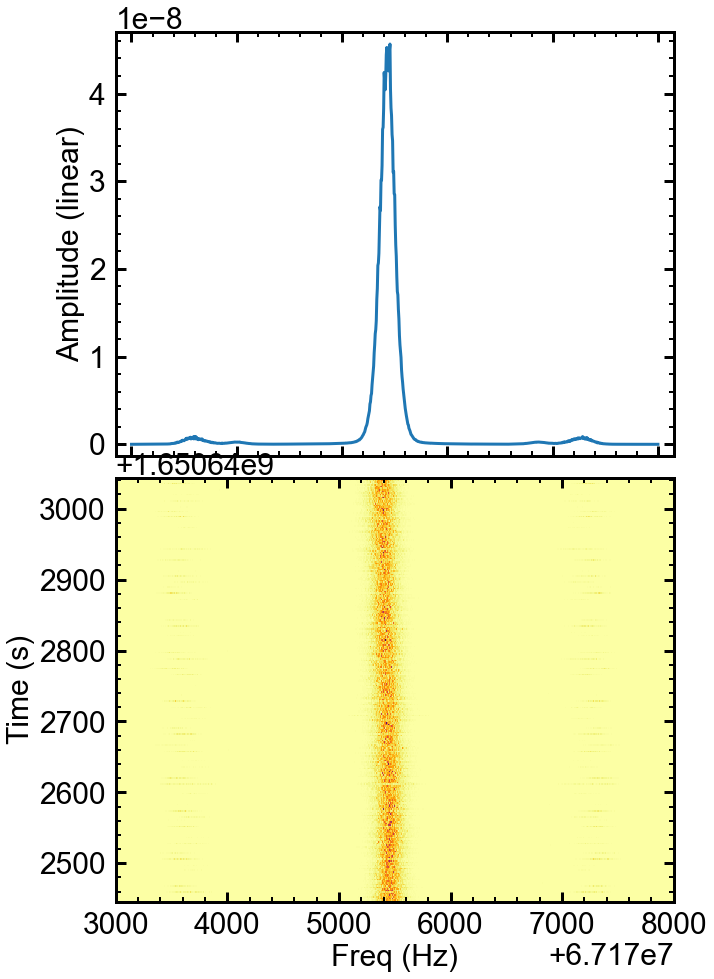

In [9]:
# colormap
directory = r'Z:\qfc\users\Armin\vibration_measurements'
# directory = r'Z:\qfc\users\Armin\timetagging_zerocrossing'
saved_filename = os.path.join(directory,"22042022_QSIMQFC_beat_10minutes")
# saved_filename = os.path.join(directory,"25042022_after_mixer")
data = np.load(saved_filename+'.npz')
time_in_s = data['time_s']
spectra_linear = data['spectra']
freq_hz = data['freq']

# freq_Hz_0 = np.median(freq_hz)
f = plt.figure(figsize=(10,16))
f.subplots_adjust(hspace=0.05)
ax0 = f.add_subplot(211)
ax0.plot(freq_hz[0], np.mean(spectra_linear,axis=0))
ax0.set_xticklabels([])
ax0.set_ylabel('Amplitude (linear)')

ax = f.add_subplot(212)
ax.pcolormesh(freq_hz,time_in_s,(spectra_linear),cmap='inferno_r')
ax.set_xlabel('Freq (Hz)')
ax.set_ylabel('Time (s)')

# f.savefig(saved_filename+'_detail.png',dpi=100,bbox_inches='tight',facecolor='white')

# Custom, uncomment when done

In [82]:
directory = r'Z:\qfc\users\Armin\timetagging_zerocrossing\06052022_qsimqfc_beat_speakerfreq'
flst = glob1(directory,'*Hz.npz*')

def plot_spectra(filename,fit=False,saved=False,norm=True,centercancel = True,
                 title=None,output=False):
    data = np.load(filename)
    normalized = lambda x : x/max(x)
    try:
        time_in_s = data['time_s']
        spectra_linear = data['spectra']
        freq = data['freq']
        amplitude = spectra_linear.mean(axis=0)
    except:
        freq = data['freq']
        amplitude = data['amplitude']
    if norm:
        amplitude = normalized(amplitude)
    if centercancel:
        freq -= np.median(freq)
    f = plt.figure()
    ax  =f.add_subplot(111)
    if not fit:
        ax.plot(freq,amplitude,'-',color='navy')
    else:
        result, mod = Gaussianfit(freq,amplitude,ax,isplot=True)
    ax.set_xlabel('Freq (Hz)')
    ax.set_ylabel('Norm. Amplitude')
    ax.set_ylim(-0.01,1.02)
    if title is not None:
        ax.text(-4500,.9,title)
#         ax.set_title(title)
    if saved:
        f.savefig(filename[:-4]+'.png',dpi=100,bbox_inches='tight',facecolor='white')
    if output:
        return freq,amplitude

In [96]:
freq = []
amp = []
drive = []
for j in range(len(flst)):
    filename  = os.path.join(directory,flst[j])
    keyword = int(flst[j][flst[j].find('newclock')+9:-7])
    title = '%i Hz'%(keyword)
    drive.append(keyword)
    _freq,_amp = plot_spectra(filename,fit=False,saved=False,title=title,output=True)
    freq.append(_freq)
    amp.append(_amp)
    plt.close('all')

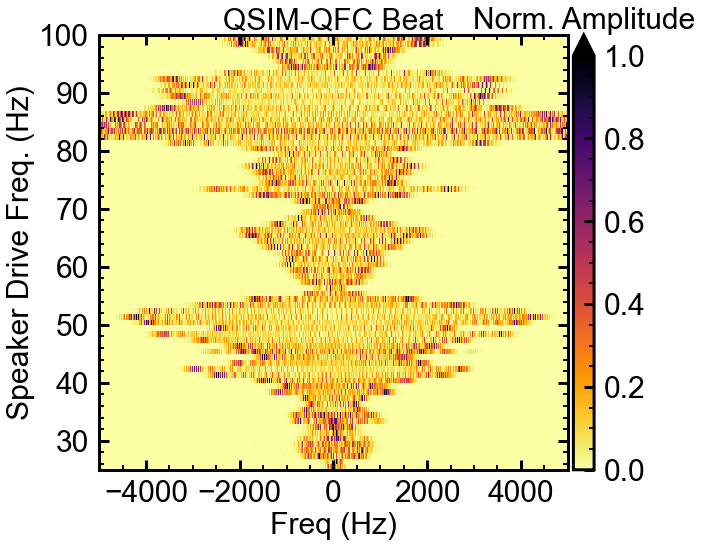

In [109]:
indsort = np.argsort(drive)
amp = np.array(amp)[indsort]
try:
    frequency = freq[0]
except:
    pass
drive = np.array(drive)[indsort]

f = plt.figure()
ax = f.add_subplot(111)
im = ax.pcolormesh(freq,drive,amp,cmap='inferno_r',vmin=0,vmax=1)
cax = f.colorbar(im,ax=ax,pad=0.01,extend='max')
cax.ax.set_title('Norm. Amplitude')
ax.set_xlabel('Freq (Hz)')
ax.set_ylabel('Speaker Drive Freq. (Hz)')
ax.set_yticks(np.arange(30,100+1,10));
ax.set_title('QSIM-QFC Beat')
f.savefig(os.path.join(directory,'06052022_qsimqfc_beat_withnewclock_freqsweep.png'),dpi=100,
          bbox_inches='tight',facecolor='white')